# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

# Understanding the dataset

In [4]:
df.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
173,174,168.4,7.1,12.8,11.7
14,15,204.1,32.9,46.0,19.0
196,197,94.2,4.9,8.1,9.7
52,53,216.4,41.7,39.6,22.6
35,36,290.7,4.1,8.5,12.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Standard Deviation is high for the complete dataset

In [7]:
df.shape

(200, 5)

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No null values in the dataset

In [9]:
df.isnull().sum().sum()

0

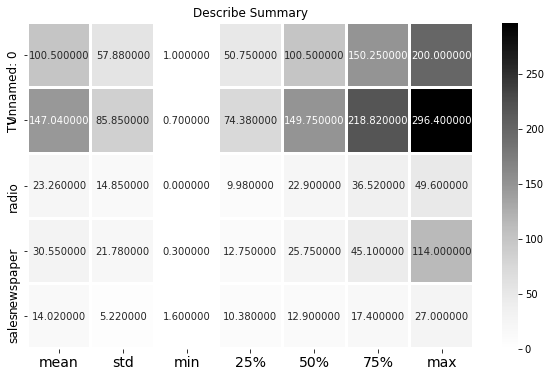

In [11]:
#describing the data visually
plt.figure (figsize = (10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot = True, fmt = 'f',cmap='Greys')
plt.xticks(fontsize = 14)
plt.yticks (fontsize = 12)
plt.title ("Describe Summary")
plt.show()

# Checking the unique values

In [14]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [16]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

# Checking the Correlation of features

In [18]:
df.corr()['sales'].sort_values().abs()

Unnamed: 0    0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

<AxesSubplot:>

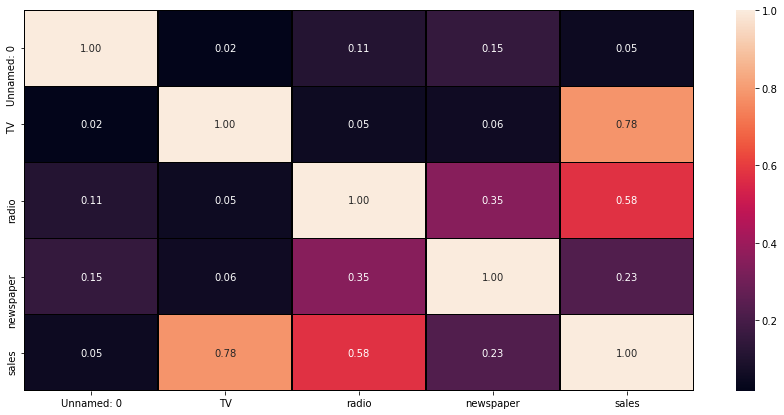

In [23]:
#Using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f') #upto 2 places of decimals

Clearly, for the analysis above, we can see that 'unnamed: 0' is not relevant to our dataset and must be dropped

In [24]:
df = df.drop (columns = ['Unnamed: 0'])
df.sample(5)

,TV,radio,newspaper,sales
119,19.4,16.0,22.3,6.6
99,135.2,41.7,45.9,17.2
133,219.8,33.5,45.1,19.6
8,8.6,2.1,1.0,4.8
109,255.4,26.9,5.5,19.8


# Checking for relationshhip between the features

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

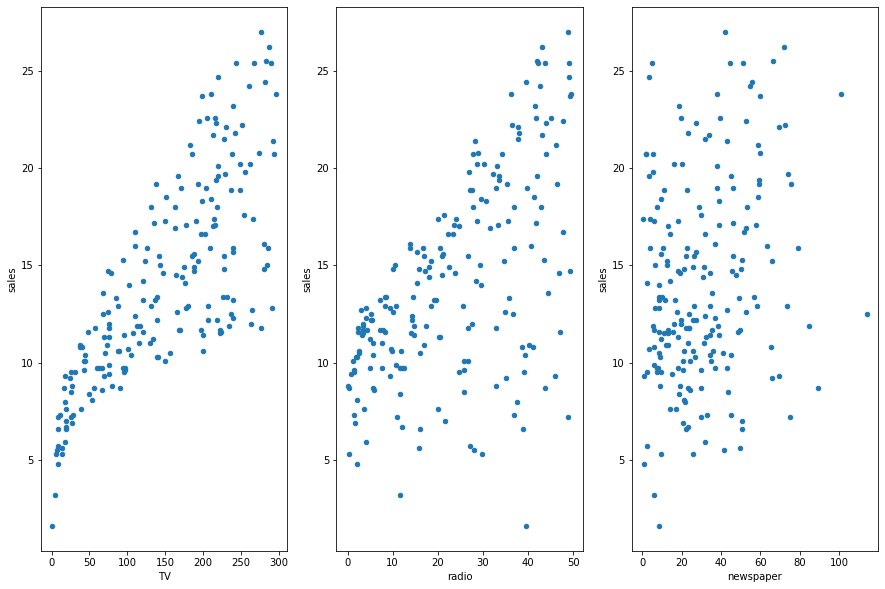

In [31]:
fig, axs = plt.subplots (1,3)
df.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize =(15,10))
df.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1])
df.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])

1. Television has clear positive relation with the label
2. radio has moderate relationship with the label
3. newspaper has the least relationship with the label

# Checking for distribution of dataset

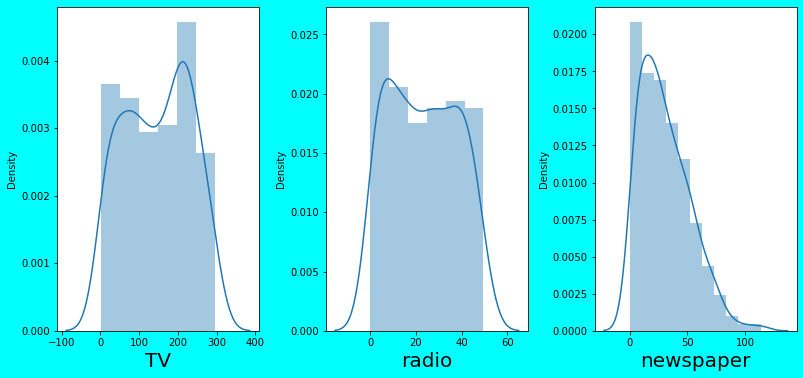

In [33]:
plt.figure(figsize = (15,10), facecolor = 'cyan')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <4: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

1. Distribution is not normal
2. right skewness is present in newspaper

# Using Power Transform for skewness removal

In [34]:
#Separating features and label
x=df.drop('sales', axis=1)
y= df.sales

In [35]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method ='yeo-johnson')
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [37]:
x = pd.DataFrame(x, columns = ['TV', 'radio', 'newspaper'])
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


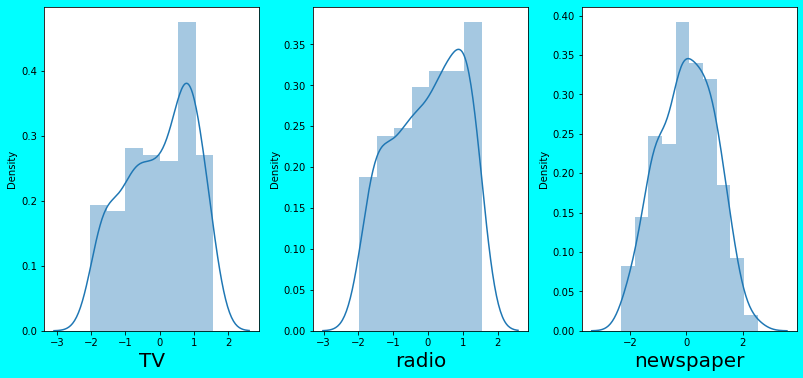

In [39]:
plt.figure(figsize = (15,10), facecolor = 'cyan')
plotnumber = 1 #this is an initiator

for column in x:
    if plotnumber <4: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (x [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

In [40]:
x.skew().sort_values().abs()

TV           0.315199
radio        0.242968
newspaper    0.077942
dtype: float64

In [41]:
x.describe()

,TV,radio,newspaper
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,6.661338e-18,-1.515454e-16,4.096723e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-2.040262e+00,-1.979863e+00,-2.324725e+00
25%,-7.733299e-01,-8.175995e-01,-7.576721e-01
50%,1.219222e-01,1.119783e-01,4.196225e-03
75%,8.379611e-01,8.950956e-01,7.876825e-01
max,1.573270e+00,1.548209e+00,2.529435e+00


# scaling the features

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

# Checking for multicolinearity

In [43]:
#Checking for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor (x_scaled, i) for i in range (x_scaled.shape[1])]
vif["features"] = x.columns  #here, vif and features are column names
vif

,vif,features
0,1.003112,TV
1,1.094332,radio
2,1.093766,newspaper


Multicolinearity is not present in the dataset

# Model Building

In [44]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

for i in range (100,151):
    x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.2, random_state = i)
    lr.fit (x_train, y_train)
    pred_train = lr.predict (x_train)
    pred_test = lr.predict (x_test)
    print (f"At random state {i}, the training accuracy is: {r2_score (y_train, pred_train)}")
    print (f"At random state {i}, the testing accuracy is: {r2_score (y_test, pred_test)}")
    print ('\n')

At random state 100, the training accuracy is: 0.902464015570458
At random state 100, the testing accuracy is: 0.9260548354681654


At random state 101, the training accuracy is: 0.8982332265210524
At random state 101, the testing accuracy is: 0.939257532725572


At random state 102, the training accuracy is: 0.9025500533538177
At random state 102, the testing accuracy is: 0.9231429333695493


At random state 103, the training accuracy is: 0.8999135551064491
At random state 103, the testing accuracy is: 0.9355512409695103


At random state 104, the training accuracy is: 0.9202598374300082
At random state 104, the testing accuracy is: 0.8567898899218594


At random state 105, the training accuracy is: 0.9039939211152427
At random state 105, the testing accuracy is: 0.9158157268038108


At random state 106, the training accuracy is: 0.9093042285957667
At random state 106, the testing accuracy is: 0.8907295385753043


At random state 107, the training accuracy is: 0.9033411447505342
At ra

In [45]:
#Actually splitting the data set
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.25, random_state = 148)
y_test.head()

158     7.3
56      5.5
97     15.5
192     5.9
153    19.0
Name: sales, dtype: float64

# 1. Using Linear Regression

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [82]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.fit(x_test, y_test)


print ("The training score is: ",(lr.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",lr.score(x_test, y_test)*100) # Training Score

y_pred = lr.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE


print ("The CV score is: ",(cross_val_score(lr,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(lr,x,y, cv=5).mean())*100)))

The training score is:  90.06193077536949
The testing score is:  91.94489954503476
The R2 score is:  91.94489954503476
The MAE is:  1.3285067578607823
The MSE is:  1.5857792130401143
The CV score is:  89.78060430607069
Difference between R2 score and CV score is:  2.1642952389640726


# 2. Using SVR

In [83]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)
svr.fit(x_test, y_test)


print ("The training score is: ",(svr.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",svr.score(x_test, y_test)*100) # Training Score

y_pred = svr.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE

print ("The CV score is: ",(cross_val_score(svr,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(svr,x,y, cv=5).mean())*100)))

The training score is:  89.62858173946636
The testing score is:  91.33363082985076
The R2 score is:  91.33363082985076
The MAE is:  1.3049387899712948
The MSE is:  1.6448482337871717
The CV score is:  89.05371919621481
Difference between R2 score and CV score is:  2.2799116336359475


# 3. Using KNN-R

In [87]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)


print ("The training score is: ",(knn.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",knn.score(x_test, y_test)*100) # Training Score

y_pred = knn.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE

print ("The CV score is: ",(cross_val_score(knn,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(knn,x,y, cv=5).mean())*100)))

The training score is:  89.93381375643364
The testing score is:  93.93103666536018
The R2 score is:  93.93103666536018
The MAE is:  1.041
The MSE is:  1.376462858198506
The CV score is:  94.01555621834635
Difference between R2 score and CV score is:  -0.08451955298616554


# 4. Using Ridge

In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(x_train, y_train)
ridge.fit(x_test, y_test)


print ("The training score is: ",(ridge.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",(ridge.score(x_test, y_test)*100)) # Training Score

y_pred = ridge.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE

print ("The CV score is: ",(cross_val_score(ridge,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(ridge,x,y, cv=5).mean())*100)))

The training score is:  90.0932720272402
The testing score is:  91.93622118698556
The R2 score is:  91.93622118698556
The MAE is:  1.3253035791853989
The MSE is:  1.5866332219487969
The CV score is:  89.79060985105633
Difference between R2 score and CV score is:  2.1456113359292317


# 5. Using Gradient Boosting Regressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr.fit(x_test, y_test)


print ("The training score is: ",(gbr.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",(gbr.score(x_test, y_test)*100)) # Training Score

y_pred = gbr.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE


print ("The CV score is: ",(cross_val_score(gbr,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(gbr,x,y, cv=5).mean())*100)))

The training score is:  90.31826534988605
The testing score is:  99.99518666259979
The R2 score is:  99.99518666259979
The MAE is:  0.025868137469485894
The MSE is:  0.03876416138338434
The CV score is:  97.76424596618438
Difference between R2 score and CV score is:  2.2313625892738855


# We can conclude that KNN-Regressor works best for this dataset since the difference between R2 score & CV is the least amongst all the models (-0.84)

In [99]:
#Hyper Parameter tuning

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors =4, algorithm ='kd_tree', leaf_size=25)
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)


print ("The training score is: ",(knn.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",knn.score(x_test, y_test)*100) # Training Score

y_pred = knn.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE

print ("The CV score is: ",(cross_val_score(knn,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(knn,x,y, cv=5).mean())*100)))

The training score is:  89.93381375643364
The testing score is:  93.93103666536018
The R2 score is:  93.93103666536018
The MAE is:  1.041
The MSE is:  1.376462858198506
The CV score is:  94.01555621834635
Difference between R2 score and CV score is:  -0.08451955298616554


# Saving the KNN-R model

In [92]:
import pickle

In [93]:
pickle.dump (knn,open('sales_prediction_regression','wb'))

# Thank You